** Store Sales and Profit Analysis using Python **

In [ ]:
# Now let's start this task by importing necessary libraies:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = 'plotly_white'

In [ ]:
data = pd.read_csv('Sample - Superstore.csv',encoding = 'latin1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
# let's start by looking at the descriptive  statistics of the dataset
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


The dataset has an order date column. we can use this column to create new columns like order month, year and orderday, which will be very valuable for sales and profit analysis according to time periods.

In [ ]:
data['Order Date'].dtypes

dtype('O')

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [ ]:
data['Order Date'].dtypes

dtype('<M8[ns]')

In [ ]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])



In [ ]:
data['Order Month'] = data['Order Date'].dt.month

In [ ]:
data['Order Year'] = data['Order Date'].dt.year

In [ ]:
data['Order Day of Week']=data['Order Date'].dt.dayofweek

# Now let’s have a look at the monthly sales:

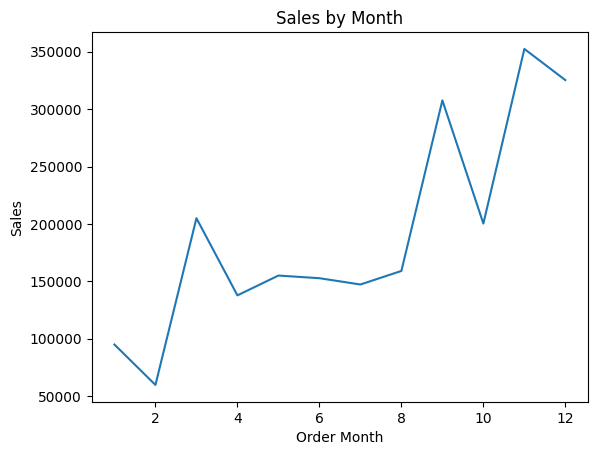

In [ ]:
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
# Plot the line chart
plt.plot(sales_by_month['Order Month'], sales_by_month['Sales'])
plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.show()


In [ ]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

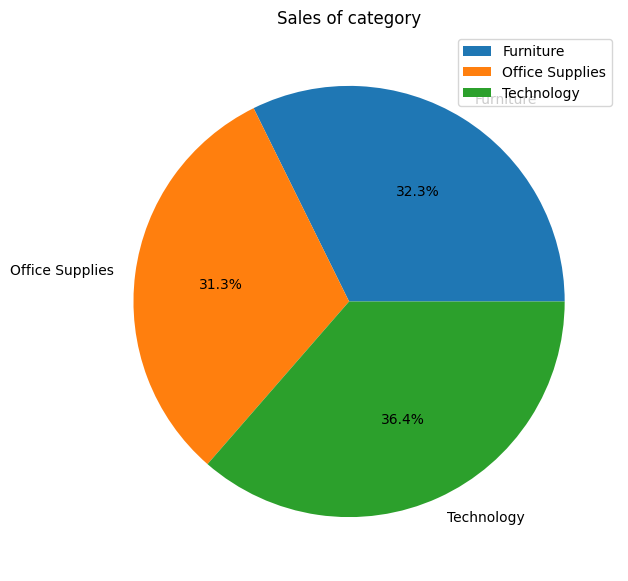

In [ ]:
# now let's have a look at the sales by category:
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()
labels = sales_by_category['Category']
sizes = sales_by_category['Sales']
plt.figure(figsize=(10,7))
plt.pie(sizes, labels = labels,autopct='%1.1f%%')
plt.title('Sales of category')
plt.legend()
plt.show()

In [ ]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [ ]:
sales_by_sub_category = data.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
sales_by_sub_category

,Sub-Category,Sales
13,Phones,330007.0540
5,Chairs,328449.1030
14,Storage,223843.6080
16,Tables,206965.5320
3,Binders,203412.7330
11,Machines,189238.6310
0,Accessories,167380.3180
6,Copiers,149528.0300
4,Bookcases,114879.9963
1,Appliances,107532.1610


**Now let's have a look at the sales by sub category**

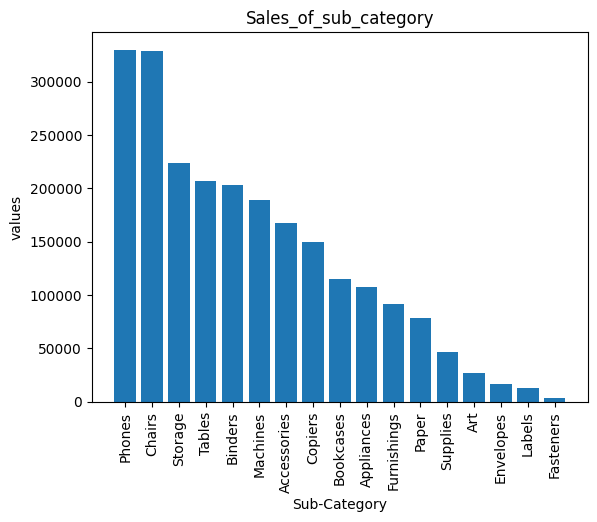

In [ ]:
plt.bar(sales_by_sub_category['Sub-Category'],sales_by_sub_category['Sales'])
plt.title('Sales_of_sub_category')
plt.xlabel('Sub-Category')
plt.ylabel('values')
plt.xticks(rotation=90)
plt.show()

**now let's have a look at the sales by month**

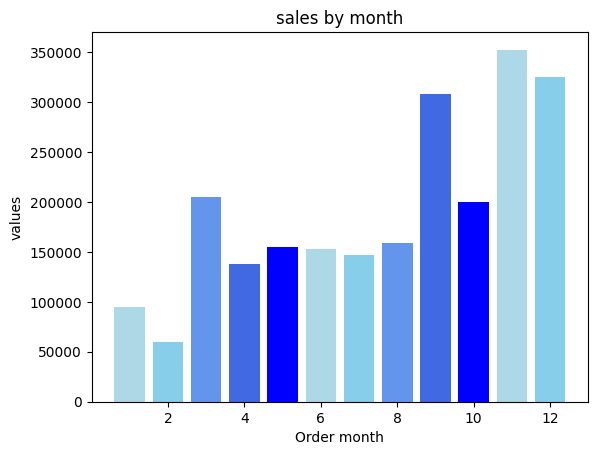

In [ ]:
colors = ['#ADD8E6', '#87CEEB', '#6495ED', '#4169E1', '#0000FF']
plt.bar(sales_by_month['Order Month'],sales_by_month['Sales'],color=colors)
plt.title('sales by month')
plt.xlabel('Order month')
plt.ylabel('values')
plt.show()

In [ ]:
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()
profit_by_month

,Order Month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


**now let's have a look at the profit by month using line chart**

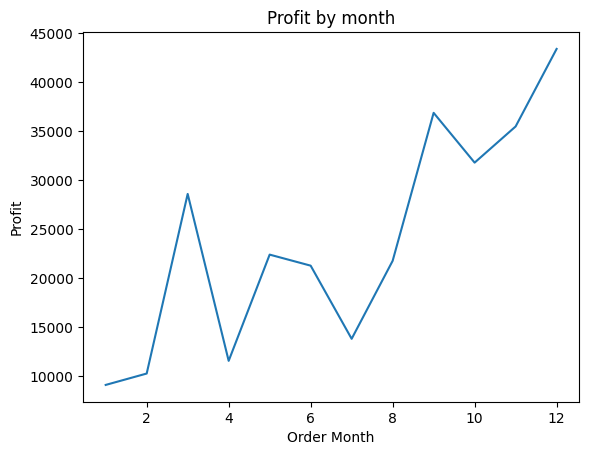

In [ ]:
plt.plot(profit_by_month['Order Month'],profit_by_month['Profit'])
plt.xlabel('Order Month')
plt.ylabel('Profit')
plt.title('Profit by month')
plt.show()

**now let's have a look at the profit by month**

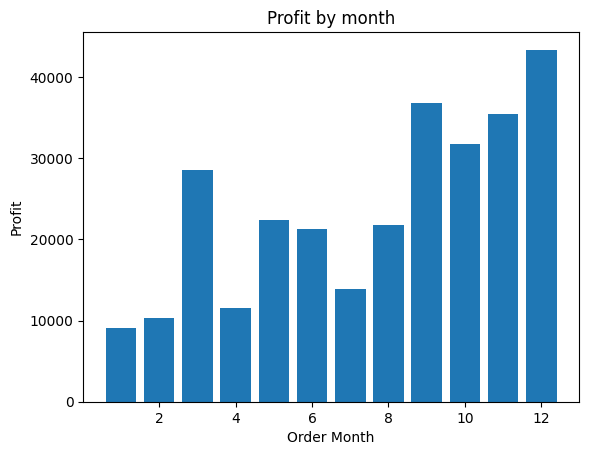

In [ ]:
plt.bar(profit_by_month['Order Month'],profit_by_month['Profit'])
plt.xlabel('Order Month')
plt.ylabel('Profit')
plt.title('Profit by month')
plt.show()

In [ ]:
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()

profit_by_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


**Now let’s have a look at the profit by category:**

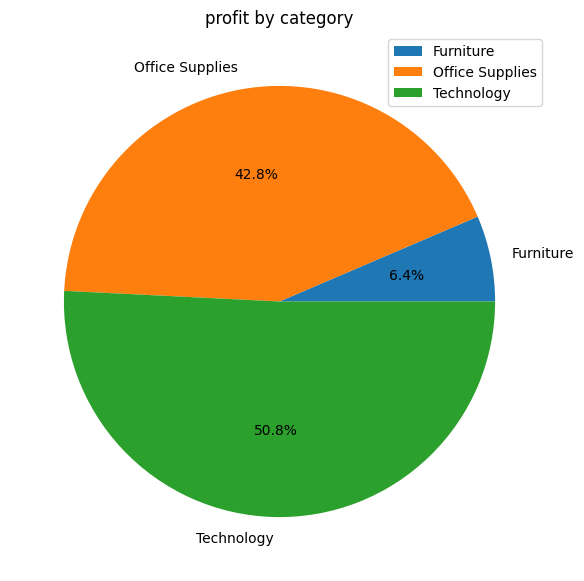

In [ ]:
labels = profit_by_category['Category']
sizes = profit_by_category['Profit']
plt.figure(figsize=(10,7))
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.title('profit by category')
plt.legend()
plt.show()


In [ ]:
profit_by_sub_category = data.groupby('Sub-Category')['Profit'].sum().reset_index()
profit_by_sub_category

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


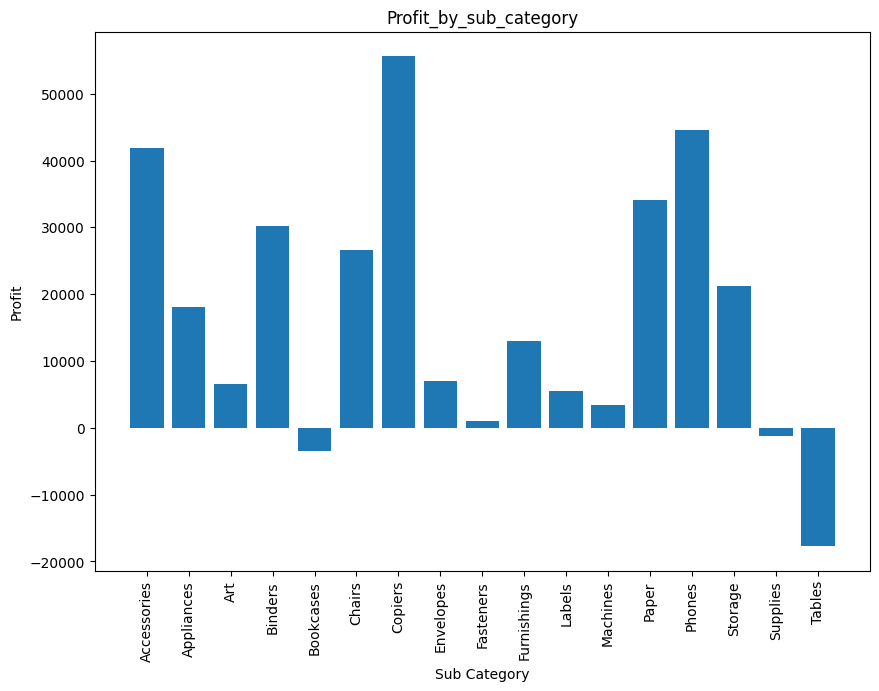

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(profit_by_sub_category['Sub-Category'],profit_by_sub_category['Profit'])
plt.title('Profit_by_sub_category')
plt.xticks(rotation=90)
plt.xlabel('Sub Category')
plt.ylabel('Profit')
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,2016,1


In [ ]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [ ]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()

sales_profit_by_segment

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


So the store has higher profits from the product sales for consumers, but the profit from corporate product sales is better in the sales-to-profit ratio. Let’s have a look at it to validate our findings:

In [ ]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


**Summary**

Store sales and profit analysis help businesses identify areas for improvement and make data-driven decisions to optimize their operations, pricing, marketing, and inventory management strategies to drive revenue and growth. I hope you liked this article on the task of analyzing the sales and profit of a store using Python.